# Document Vector Representation

In [1]:
##Cleaning text
import re
#A regular expression (or RE) specifies a set of strings 
#that matches it; the functions in this module let you check
#if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).



import time
import nltk
# https://www.machinelearningplus.com/nlp/gensim-tutorial/
import gensim # used for topic modelling
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import wordnet

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

/Applications/anaconda3/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/AirMorena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/AirMorena/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/AirMorena/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# import data from local disk
data = pd.read_csv('/Users/AirMorena/Desktop/final_proj/csv/data_clean.csv')

In [3]:
# 2 functions were created one that uses the stemmer method and another the lemmatizer
def tokenizer_stemmer(text, characters, stop_words):
    text_ = text.lower()# make everything lower case
    text_ = re.sub("\d", " ", text_)# it means convert any integer into white space

    for character in characters:
        text_ = text_.replace(character, " ")# replace character by white space

    # initialize tokenizer and tokenize text
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    list_words = tokenizer.tokenize(text_)# make a list of tokenized words

    # initialize and apply stemmer
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemm = [stemmer.stem(word) for word in list_words if word not in stop_words]
    return text_stemm

def tokenizer_lemmatizer(text, characters, stop_words):
    text_ = text.lower()# make everything lower case
    text_ = re.sub("\d", " ", text_)# it means convert any integer into white space

    for character in characters:
        text_ = text_.replace(character, " ")

    # initialize tokenizer and tokenize text
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    list_words = tokenizer.tokenize(text_)

    # initialize and apply stemmer
    lemmatizer = WordNetLemmatizer()
    text_lemm = [lemmatizer.lemmatize(word) for word in list_words if word not in stop_words]
    return text_lemm


def tokenizer_ner(text, characters, stop_words):# asssign named entity recognition to words
    # Get NER
    return pos_tag(text)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41661 entries, 0 to 41660
Data columns (total 23 columns):
App                       41661 non-null object
Category                  41661 non-null object
Rating                    41661 non-null float64
Reviews                   41661 non-null int64
Size                      41661 non-null float64
Installs                  41661 non-null float64
Type                      41661 non-null object
Price                     41661 non-null float64
Content Rating            41661 non-null object
Genres                    41661 non-null object
Last Updated              41661 non-null object
Current Ver               41661 non-null object
Android Ver               31138 non-null float64
Translated_Review         40414 non-null object
Sentiment                 40422 non-null object
Sentiment_Polarity        40422 non-null float64
Sentiment_Subjectivity    40422 non-null float64
Reviewslog                41661 non-null float64
Current Ver_clean   

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Reviewslog,Current Ver_clean,year,month,day,month_year
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,6.874198,2.0,2018,1,15,2018-01
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,It bad >:(,Negative,-0.725,0.833333,6.874198,2.0,2018,1,15,2018-01
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,like,Neutral,0.000,0.000000,6.874198,2.0,2018,1,15,2018-01
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,NaN,NaN,NaN,NaN,6.874198,2.0,2018,1,15,2018-01
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,I love colors inspyering,Positive,0.500,0.600000,6.874198,2.0,2018,1,15,2018-01


In [6]:
data.shape

(41661, 23)

In [7]:
len(data['Translated_Review'].unique())

26683

In [8]:
len(data['App'].unique())

1020

In [9]:
# we only want the unique 'Translated_Review': so we can drop nans and we can drop duplicates

In [10]:
len(data['Translated_Review'].unique())

26683

In [11]:
# drop duplicates
# any duplicates in the data
data['Translated_Review'].duplicated().sum()

14978

In [12]:
# drop duplicates 
data['Translated_Review']= data['Translated_Review'].drop_duplicates()

In [13]:
# drop entries with nan
data['Translated_Review'].isna().sum()

14979

In [14]:
# data2 is cleaned (no duplicates no nan)
data2 = data[pd.notnull(data['Translated_Review'])]

In [15]:
data2['Translated_Review'].isna().sum()

0

In [16]:
len(data2['Translated_Review'].unique())

26682

In [17]:
################################# clean Translated review

In [18]:
# transform dataframe into a list of reviews (Text is the variable review)
corpus = data2['Translated_Review'].tolist()

In [19]:
# get the first review from the list corpus
corpus[0]

"A kid's excessive ads. The types ads allowed app, let alone kids"

In [20]:
# get sample from corpus list
samples = corpus[:26682]

In [21]:

# Use the German stopwords.
stpwrds = stopwords.words("english")

# We added some additional characters to avoid.
characters = [',', '.', '(', ')', '!', ';', '-', ':', '...', '"',
                "''", "``", '~http', '?', '@', '#', '/', "'",
                '&', '--', '[', ']', '=', '||', '+', '_', '..',
                '%', '|', '~', 'http',"\n","—","•","“","„","–",
              "$",">","*"]

In [22]:
#print(len(stpwrds))
#print(stpwrds)

In [23]:
# remore rare characters, stopwords, stem words), using the 100 first reviews (samples)
clean_corpus_stemm = [tokenizer_stemmer(text, characters, stpwrds) for text in samples]

In [24]:
#you obtain a list of lists (each reviews is a list of words)
#clean_corpus_stemm

In [25]:
# count the number of reviews
len(clean_corpus_stemm)

26682

In [26]:
# get the first list (the first review)
clean_corpus_stemm[0]

['kid', 'excess', 'ad', 'type', 'ad', 'allow', 'app', 'let', 'alon', 'kid']

In [27]:
# count the number of words in the first review
len(clean_corpus_stemm[0])

10

In [28]:
# In order to obtain the list of count of words for each review from clean corpus stem , we did a for loop

In [29]:
# create an empty list for the number of words by review for all the reviews in the list of reviews
count_words_reviews_list= []

# we have a 100 reviews, so 100 list of words within the overall list of reviews
list_of_reviews=clean_corpus_stemm

# range (1 to 100)
for i in range(len(list_of_reviews)):

    count_words_per_review=len(list_of_reviews[i])
    
    count_words_reviews_list.append(count_words_per_review)

In [30]:
# print count_words_reviews_list
#count_words_reviews_list

In [31]:
# transform the list into a series
count_words_reviews_series=pd.Series(count_words_reviews_list)

In [32]:
# convert series into dataframe
#count_words_reviews_series.to_frame() 

In [33]:
# store it in count_words_reviews_df
count_words_reviews_df=count_words_reviews_series.to_frame() 

In [34]:
# change the name of the column zero to 'count number of words by review_id'
#count_words_reviews_df.rename(columns={0: 'count number of words by review_id'})

In [35]:
df2 = count_words_reviews_df.rename(columns={0: 'count number of words by review_id'})

In [36]:
#df2 

In [37]:
df2 = df2.reset_index()

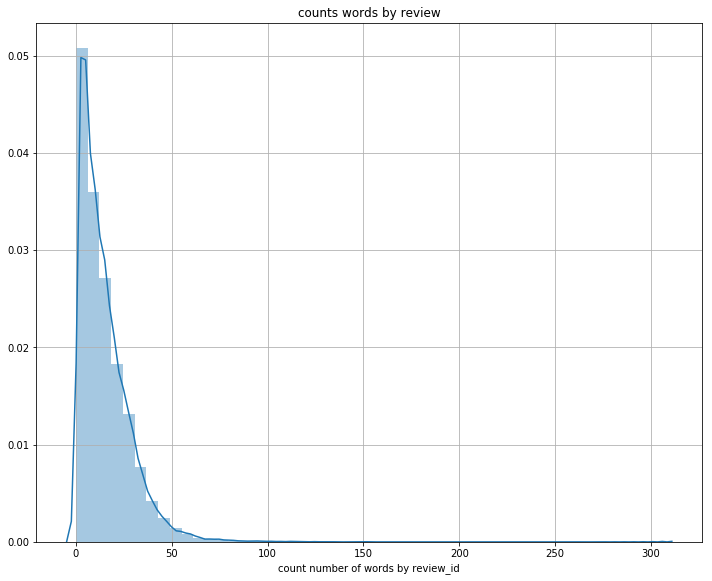

In [110]:
# make displot of counts of words for each review_id
_=plt.figure(figsize=(10,8))
sns.distplot(df2['count number of words by review_id'], bins=50)
plt.grid(True)
plt.tight_layout()
_=plt.title('counts words by review')

In [111]:
df2.describe()
# mean number of words by review is 14 words based on the 26682

,index,count number of words by review_id
count,26682.000000,26682.000000
mean,13340.500000,14.989544
std,7702.574277,13.315172
min,0.000000,0.000000
25%,6670.250000,5.000000
50%,13340.500000,12.000000
75%,20010.750000,21.000000
max,26681.000000,306.000000


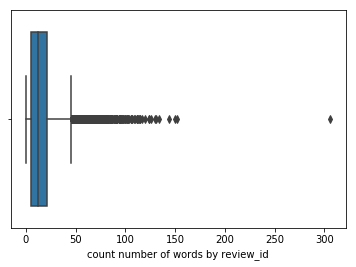

In [112]:
# boxplot
sns.boxplot(df2['count number of words by review_id'])

In [51]:
clean_corpus_lemm = [tokenizer_lemmatizer(text, characters, stpwrds) for text in samples]

In [53]:
clean_corpus_lemm[0]

['kid',
 'excessive',
 'ad',
 'type',
 'ad',
 'allowed',
 'app',
 'let',
 'alone',
 'kid']

# Natural Language Processing - Data pre-processing

# Feature Extraction

## Bag of Words

In [113]:
# timeit function
start = time.time()

# CountVectorizer: Convert a collection of text documents to a matrix of token counts
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

matrix = CountVectorizer(max_features=1000)
# build a vocabulary that only consider the top max_features ordered by term frequency across the corpus

X = matrix.fit_transform(data2['Translated_Review']).toarray()
# fit_transform is a method that is apply to the matrix (the matrix is an object)
# fit_transform: Learn the vocabulary dictionary and return term-document matrix.

end = time.time()
print("It took {} sec to fit and transform all documents.".format(end - start))

It took 0.9715640544891357 sec to fit and transform all documents.


In [114]:
matrix

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [115]:
X.shape

(26682, 1000)

In [116]:
type(X)

numpy.ndarray

In [117]:
# X is a matrix, each vector is one review, print X
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [118]:
# vocabulary_ : dict is an attribute of  CountVectorizer. The number represents the frequency of that word in the corpus
# the number (value), is the order of the key
matrix.vocabulary_

{'ads': 28,
 'the': 860,
 'app': 60,
 'let': 469,
 'kids': 451,
 'it': 440,
 'bad': 84,
 'like': 474,
 'love': 505,
 'colors': 170,
 'hate': 387,
 'cute': 209,
 'fun': 340,
 'horrible': 404,
 'even': 275,
 'color': 169,
 'sure': 838,
 'game': 346,
 'too': 882,
 'many': 516,
 'missing': 539,
 'good': 367,
 'great': 372,
 'ok': 587,
 'this': 870,
 'beautiful': 96,
 'perfect': 625,
 'book': 109,
 'and': 49,
 'books': 111,
 'easy': 255,
 'try': 896,
 'around': 67,
 'end': 264,
 'something': 797,
 'want': 942,
 'least': 465,
 'enough': 269,
 'options': 601,
 'however': 410,
 'that': 859,
 'can': 136,
 'my': 555,
 'full': 339,
 'review': 722,
 'wanted': 943,
 'access': 14,
 'pictures': 636,
 'don': 243,
 'need': 558,
 'needs': 560,
 'way': 949,
 'im': 418,
 'paying': 619,
 'free': 331,
 'apps': 64,
 'uninstall': 908,
 'immediately': 421,
 'real': 693,
 'either': 260,
 'really': 694,
 'enjoying': 268,
 'application': 62,
 'complaint': 176,
 'small': 789,
 'hard': 385,
 'plus': 647,
 'impossib

In [119]:
# length of the dictionnary is 1000 words
len(matrix.vocabulary_)

1000

In [120]:
# store the dictionnary into bow_dict
bow_dict= matrix.vocabulary_

In [121]:
def visualize_wordcloud_dict_frequencies(dict_freqs, title, relative_scaling=0.5, max_words=100,
                               background_color='black'):
    plt.figure(figsize=(10, 10))
    wordcloud = WordCloud(width=900, height=500, max_words=max_words, relative_scaling=relative_scaling,
                         normalize_plurals=False, background_color=background_color).generate_from_frequencies(
       dict_freqs)
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

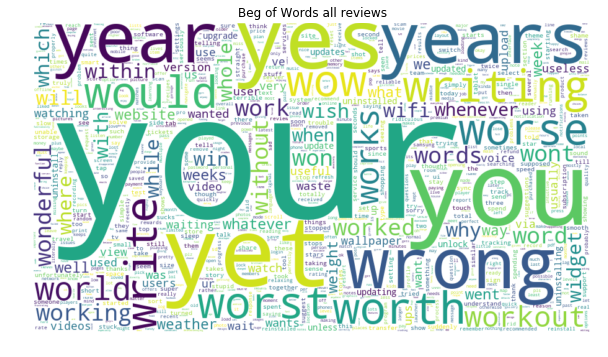

In [122]:
# word cloud: this is not normalised, so we will show which woor
title='Beg of Words all reviews'
dict_freqs=bow_dict

visualize_wordcloud_dict_frequencies (dict_freqs, title, relative_scaling=0.5, max_words=1000,
                               background_color='white')

## TF-IDF: term frequency-inverse document frequency
Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [123]:
start = time.time()

# TfidfVectorizer: Convert a collection of raw documents to a matrix of TF-IDF features.
#Equivalent to CountVectorizer followed by TfidfTransformer.
vectorizer = TfidfVectorizer(max_df=1000, min_df=100)

X_tfidf = vectorizer.fit_transform(samples)

end = time.time()
print("It took {} sec to fit and transform all documents.".format(end - start))

It took 0.6590909957885742 sec to fit and transform all documents.


In [124]:
X_tfidf.shape

(26682, 730)

In [125]:
type(X_tfidf)
# I have to convert using toarray since I get a csr Compressed Sparse Column matrix
# read more on https://docs.scipy.org/doc/scipy/reference/sparse.html

scipy.sparse.csr.csr_matrix

In [126]:
# we need to add "toarray" to see the matrix
X_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.62341986, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [127]:
vectorizer.vocabulary_

{'let': 335,
 'kids': 320,
 'bad': 61,
 'colors': 118,
 'hate': 273,
 'cute': 148,
 'horrible': 286,
 'color': 117,
 'sure': 605,
 'too': 638,
 'missing': 384,
 'ok': 417,
 'beautiful': 70,
 'perfect': 450,
 'book': 78,
 'books': 79,
 'try': 648,
 'around': 48,
 'end': 189,
 'something': 575,
 'least': 331,
 'enough': 192,
 'options': 429,
 'however': 290,
 'my': 396,
 'full': 241,
 'review': 523,
 'wanted': 685,
 'access': 9,
 'pictures': 459,
 'don': 172,
 'needs': 399,
 'im': 294,
 'paying': 446,
 'apps': 45,
 'uninstall': 659,
 'immediately': 295,
 'real': 505,
 'either': 185,
 'application': 44,
 'small': 572,
 'hard': 271,
 'plus': 468,
 'impossible': 297,
 'people': 449,
 'care': 99,
 'install': 302,
 'download': 176,
 'first': 226,
 'place': 460,
 'keeps': 317,
 'asking': 52,
 'never': 401,
 'ever': 198,
 'stopped': 591,
 'working': 717,
 'do': 169,
 'pretty': 479,
 'wish': 708,
 'picture': 458,
 'if': 293,
 'save': 534,
 'close': 114,
 'may': 372,
 'lose': 360,
 'found': 234,


In [128]:
# store the dict
TFIDF_dict= vectorizer.vocabulary_

In [129]:
# list comprehension and use the sorted function on the tuples made of (value, key)
#sorted_TFIDF_dict = sorted((value, key) for (value, key) in TFIDF_dict.items())
# list(sorted_TFIDF_dict)
# we got tuples...
# let s try something else

In [130]:
# create a dataframe from dictionnary to order the values by ascending order: the keys should be rows, pass ‘index’
pd.DataFrame.from_dict(TFIDF_dict, orient='index')

,0
let,335
kids,320
bad,61
colors,118
hate,273
cute,148
horrible,286
color,117
sure,605
too,638


In [131]:
#  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html
# The “orientation” of the data. If the keys of the passed dict should be the columns of the resulting DataFrame, 
# pass ‘columns’ (default). Otherwise if the keys should be rows, pass ‘index’.

In [132]:
# convert the dict into dataframe, change the name of the column and sort it
df3=pd.DataFrame.from_dict(TFIDF_dict, orient='index').rename(columns={0:'order_dict'})

In [133]:
df3

,order_dict
let,335
kids,320
bad,61
colors,118
hate,273
cute,148
horrible,286
color,117
sure,605
too,638


In [134]:
###########################################################################

In [135]:
 #rename columns name
df4= pd.DataFrame.from_dict(TFIDF_dict, orient='index').reset_index().rename(columns={'index':'words',0:'index'})


In [136]:
list_from_df_dict = df_dict.sort_values(by='index')['words'].tolist()

NameError: name 'df_dict' is not defined

In [137]:
list_from_df_dict = df4.sort_values(by='index')['words'].tolist()

In [ ]:
list_from_df_dict

In [138]:
df_ordered_TFIDF_dict['Index'].tolist()

NameError: name 'df_ordered_TFIDF_dict' is not defined

In [ ]:
list_ordered_TFIDF=df_ordered_TFIDF_dict['Index'].tolist()

In [ ]:
# word cloud: this is not normalised
title='TF-IDF for all reviews'
dict_freqs=TFIDF_dict

visualize_wordcloud_dict_frequencies (dict_freqs, title, relative_scaling=0.5, max_words=1000,
                               background_color='black')

In [ ]:
# WordNet® is a large lexical database of English
# WordNet contains a large collection of words and vocabulary 
# from the English language. These words are related to each other and are grouped into sets.
# set is a list of unique elements

In [ ]:
def get_food_words_in_my_corpus(words_dictionary):
   # Get a representative list of words in the food topic
    food = wordnet.synset('food.n.02')
    food_words = list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))
   
   # Select the words in the dic
    words_dictionary_keys = list(words_dictionary.keys())
    my_food = []
    for food_name in food_words:
        if food_name in words_dictionary_keys:
            my_food.append(food_name)
   
    return my_food

In [ ]:
# call the function on the dict
get_food_words_in_my_corpus(TFIDF_dict)

In [ ]:
#store the list of foods
list_myfood=get_food_words_in_my_corpus(TFIDF_dict)

In [ ]:
# transform X_tfidf into a dataframe (Series to df, and the columns are the keys)
X_tfidf_array=X_tfidf.toarray()


In [ ]:
type(X_tfidf_array)

In [ ]:
print(X_tfidf_array)

In [ ]:
list_TFIDF_dict

In [ ]:
# Take a DataFrame as input to your DataFrame 
my_df = pd.DataFrame(data=X_tfidf_array, columns=list_from_df_dict)

In [ ]:
my_df.shape

In [ ]:
my_df.head(10)

In [ ]:
# print the reviews and check value for coffee
my_df.iloc[:]['good'].sort_values()
# 9,14,21 etc have coffee

In [ ]:
# print the text of the review for the ones that say that have coffee eg 3083
samples[8350]

In [ ]:
# select all the reviews which have a frequency of the word coffee more than 0 (column coffee):
my_df[my_df['coffee'] > 0]

In [ ]:
# store it
selection = my_df[my_df['coffee'] > 0]

In [ ]:
#print the dataframe of reviews where the frequency of coffee is higher than 0 
selection
# pick the first id, in this case 9

In [ ]:
# choose as the first row the number iloc[:1], is the index 9
#selection = my_df[my_df['coffee'] > 0]
selection.iloc[:1]

In [ ]:
selection.iloc[:1]['coffee']

# Calculate the cosine similarity

In [ ]:
# get the cosine similarity of the first review where coffee freq is higher than 0 with the other reviews
cosine_similarity([my_df.iloc[9].as_matrix()], my_df.as_matrix())

In [ ]:
similarity= cosine_similarity([my_df.iloc[9].as_matrix()],my_df.as_matrix()) 
# 9 we want to compare with the 5 first of highest cosine similarity  and get the index and see what they talk about

In [ ]:
print(cosine_similarity([my_df.iloc[93].as_matrix()],my_df.as_matrix()) )

In [ ]:
similarity[0]

In [ ]:
pd.DataFrame(similarity[0])

In [ ]:
# create df2 with the similarities
df5=pd.DataFrame(similarity[0])

In [ ]:
df5

In [ ]:
df5.sort_values(by=0)

In [ ]:
# give the 5 most similar to review 93 (cosine similarity is the highest , 1 is when it is pairing with itsefl)
# 93 is the review o we chose that is why it is 1
df5.sort_values(by=0).tail()

In [ ]:
df5.rename(columns={'0':'similarity'}, inplace=True)

In [ ]:
df5

In [ ]:
# add column similaroty from df5 to my_df
my_df['similarity'] = df5

In [ ]:
# new df with added column similarity
my_df.sort_values(by='similarity')

In [ ]:
samples[2539]

In [ ]:
samples[1070]

In [ ]:
samples[93]

In [ ]:
samples[6893]

In [ ]:
my_df.loc[6893,'similarity']